In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import re
from glob import glob


def read_band(fname):
    nband,nkpts =0,0;
    file_num = [];
    with open(fname) as f:
        header =  next(f);
        nband,nkpts = map(int,re.findall('\d+', header));
        for line in f:
            file_num+= list(map(float,re.sub(" +"," ",line.strip()).split(" "))) ;  

    ndiv   = nband+3
    file_num = [ [file_num[x:x+3],file_num[x+3:x+ndiv]]  for x in np.arange(0, len(file_num), ndiv)]

    kpoints = np.array([ kp for kp,eig in file_num]);
    eigvals = np.array([eig for kp,eig in file_num]);
    return kpoints,eigvals.T;


def plot_projbands( kpoints, bands, projs ):
    fig = plt.figure();
    ax  = plt.gca();
    xaxis = np.cumsum(np.linalg.norm(np.diff(kpoints,axis=0, prepend=[kpoints[0]]),axis=1));
    for band, proj in zip(bands, projs):
        nt= len(xaxis)         #define the number of lines
        smin,smax=-1/2, 1/2; #Define the limits of the color
        x = xaxis; y = band; s = proj; 

        #Create segments and Collect them all. Setting a color map
        points = np.array([x, y]).T.reshape(nt, 1, 2); # nt points [2-dim] points
        segments = np.concatenate([points[:-1], points[1:]], axis=1); #nt -1 [ [2-dim],[2-dim] ] line segments
        lc = LineCollection(segments, cmap=plt.get_cmap('Spectral'),
                            norm=plt.Normalize(smin,smax));
        
        #Set a color parameter for each line
        lc.set_array(s)     

        #Set a line width to all line
        lc.set_linewidth(3) 
        #plot
        ax.add_collection(lc);
    ax.set_xlim( xaxis.min(), xaxis.max())
    ax.set_ylim( bands.min(), bands.max())
    return fig,ax;


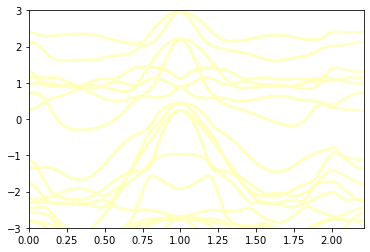

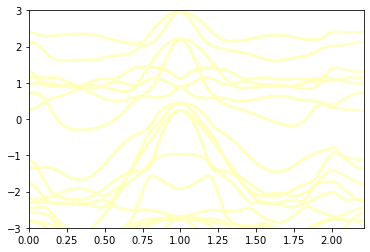

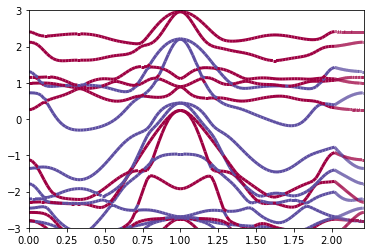

In [25]:
fname ="qe_MnSTe_SOC.bands.spin"

spin_comp = ("sx","sy","sz");
spin_comp= {s:dict for s in spin_comp};
for i,s in enumerate(spin_comp):
    kpoints,eigvals = read_band( fname+"."+str(i+1) );
    spin_comp[s]=eigvals;


kpoints,eigvals = read_band(fname);
EF =-0.2740;
bands = eigvals - EF;

for sp in spin_comp:
    plot_projbands( kpoints, bands, spin_comp[sp] );
    plt.ylim(-3,3)


In [27]:
np.max(spin_comp["sx"])

-0.0